In [1]:
import pandas as pd
import datetime

import pathlib
cwd = pathlib.Path.cwd()

In [3]:
code_directory = cwd.parents[1]
data_directory = code_directory / "data"
trade_data_directory = data_directory / "trade_data"
trade_data_directory

WindowsPath('c:/Users/gonem/CodeProjects/msc-seminar-baqm/code/data/trade_data')

In [8]:
sunflower_oil = pd.read_csv(trade_data_directory/"sunflower_oil.csv")
maize_corn = pd.read_csv(trade_data_directory/"maize_corn.csv")
wheat = pd.read_csv(trade_data_directory/"wheat.csv")

dfs = (sunflower_oil, maize_corn, wheat)
wheat.head(5)

,DATAFLOW,LAST UPDATE,freq,declarant,partner,product,flow,stat_regime,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-057380(1.0),03/01/23 13:41:00,M,3,1,100119,1,1,QUANTITY_TON,2012-01,1973.4,NaN
1,ESTAT:DS-057380(1.0),03/01/23 13:41:00,M,3,1,100119,1,1,QUANTITY_TON,2012-02,283.6,NaN
2,ESTAT:DS-057380(1.0),03/01/23 13:41:00,M,3,1,100119,1,1,QUANTITY_TON,2012-03,5358.7,NaN
3,ESTAT:DS-057380(1.0),03/01/23 13:41:00,M,3,1,100119,1,1,QUANTITY_TON,2012-04,25.0,NaN
4,ESTAT:DS-057380(1.0),03/01/23 13:41:00,M,3,1,100119,1,1,QUANTITY_TON,2012-05,796.4,NaN


In [16]:
corn_product_codes = maize_corn["product"].drop_duplicates().to_list()
sunflower_product_codes = sunflower_oil["product"].drop_duplicates().to_list()
wheat_product_codes = wheat["product"].drop_duplicates().to_list()

corn_product_codes, sunflower_product_codes, wheat_product_codes

([10059000], [15121191, 15121990], [100119, 100199, 100810])

In [17]:
trade_data = pd.concat([sunflower_oil, maize_corn, wheat], ignore_index=True)
trade_data["TIME_PERIOD"] = pd.to_datetime(trade_data["TIME_PERIOD"], format = '%Y-%m').dt.date
trade_data = trade_data.rename(columns={"partner": "PARTNER_codes", "declarant": "DECLARANT_codes"})
trade_data = trade_data.drop_duplicates()

trade_data.head(5)

,DATAFLOW,LAST UPDATE,freq,DECLARANT_codes,PARTNER_codes,product,flow,stat_regime,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-01-01,1295.6,NaN
1,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-02-01,1027.2,NaN
2,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-03-01,5900.8,NaN
3,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-04-01,3532.2,NaN
4,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-05-01,507.6,NaN


In [18]:
partner_countries = pd.read_csv(data_directory/"trade_data/partners.csv", sep = ";")
partner_countries.head(5)

,PARTNER_codes,PARTNER_Labels
0,1,France
1,3,Netherlands
2,4,Germany
3,5,Italy
4,6,United Kingdom


In [19]:
trade_data = pd.merge(trade_data, partner_countries, on = ['PARTNER_codes'], how = 'inner')

trade_data.head(5)

,DATAFLOW,LAST UPDATE,freq,DECLARANT_codes,PARTNER_codes,product,flow,stat_regime,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG,PARTNER_Labels
0,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-01-01,1295.6,NaN,France
1,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-02-01,1027.2,NaN,France
2,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-03-01,5900.8,NaN,France
3,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-04-01,3532.2,NaN,France
4,ESTAT:DS-057380(1.0),06/01/23 14:01:00,M,3,1,15121191,1,1,QUANTITY_TON,2005-05-01,507.6,NaN,France


In [23]:
trade_data_pivot = trade_data.pivot(index=['PARTNER_Labels', 'TIME_PERIOD', 'product'], 
                              columns='indicators', 
                              values=['OBS_VALUE'])

trade_data_pivot.columns = trade_data_pivot.columns.map('_'.join)
trade_data_pivot = trade_data_pivot.reset_index()
trade_data_pivot = trade_data_pivot.dropna()

trade_data_pivot.head(5)

,PARTNER_Labels,TIME_PERIOD,product,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO
0,Afghanistan,2021-03-01,10059000,0.0,0.04
1,Antigua and Barbuda,2020-01-01,10059000,54.0,21.20
2,Antigua and Barbuda,2020-04-01,10059000,27.0,12.14
3,Argentina,2005-01-01,10059000,8100.0,937.50
4,Argentina,2005-01-01,15121191,21086.3,10489.97


In [24]:
trade_data_total = trade_data_pivot\
.groupby(['product', 'TIME_PERIOD']).agg({'OBS_VALUE_QUANTITY_TON': 'sum', 
                                          'OBS_VALUE_VALUE_1000EURO': 'sum'})

trade_data_total = trade_data_total.reset_index()
trade_data_total['price'] = trade_data_total['OBS_VALUE_VALUE_1000EURO']/trade_data_total['OBS_VALUE_QUANTITY_TON']

trade_data_total.head(5)

,product,TIME_PERIOD,OBS_VALUE_QUANTITY_TON,OBS_VALUE_VALUE_1000EURO,price
0,100119,2012-01-01,10246.4,2163.74,0.211171
1,100119,2012-02-01,14823.1,3651.31,0.246326
2,100119,2012-03-01,14406.4,3073.63,0.213352
3,100119,2012-04-01,3870.8,886.93,0.229134
4,100119,2012-05-01,5339.7,1313.20,0.245931


array([[<AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>],
       [<AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>],
       [<AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>],
       [<AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>,
        <AxesSubplot: xlabel='TIME_PERIOD'>]], dtype=object)

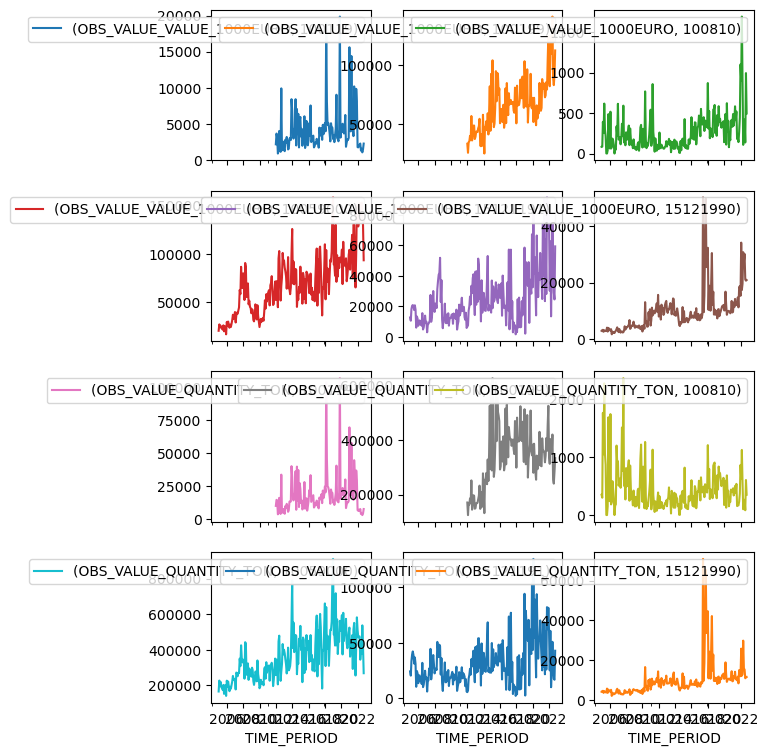

In [66]:
trade_data_total[['product', 'TIME_PERIOD', 'OBS_VALUE_VALUE_1000EURO', 'OBS_VALUE_QUANTITY_TON']]\
    .set_index(['product', 'TIME_PERIOD'])\
    .unstack(level=0)\
    .plot(subplots=True, figsize=(7, 9), layout=(4, 3))
